In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2

# Ensure we're in the project root
if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('..')

sys.path.append(os.path.abspath("."))

print("🔍 Data Exploration Notebook")
print(f"Current directory: {os.getcwd()}")

🔍 Data Exploration Notebook
Current directory: D:\colorization_task3\conditional-colorization-project


In [2]:
# Explore the dataset structure
data_dirs = ['data/train', 'data/val']
dataset_info = {}

for data_dir in data_dirs:
    if os.path.exists(data_dir):
        files = [f for f in os.listdir(data_dir) 
                if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
        dataset_info[data_dir] = files
        print(f"📁 {data_dir}: {len(files)} images")
        
        # Show first few filenames
        for i, filename in enumerate(files[:3]):
            print(f"   {i+1}. {filename}")
        if len(files) > 3:
            print(f"   ... and {len(files)-3} more")
    else:
        print(f"❌ {data_dir}: Directory not found")
        dataset_info[data_dir] = []

total_images = sum(len(files) for files in dataset_info.values())
print(f"\n📊 Total dataset: {total_images} images")

📁 data/train: 10 images
   1. 0.jpg
   2. 1004.jpg
   3. 1008.jpg
   ... and 7 more
📁 data/val: 10 images
   1. 0.jpg
   2. 1004.jpg
   3. 1008.jpg
   ... and 7 more

📊 Total dataset: 20 images


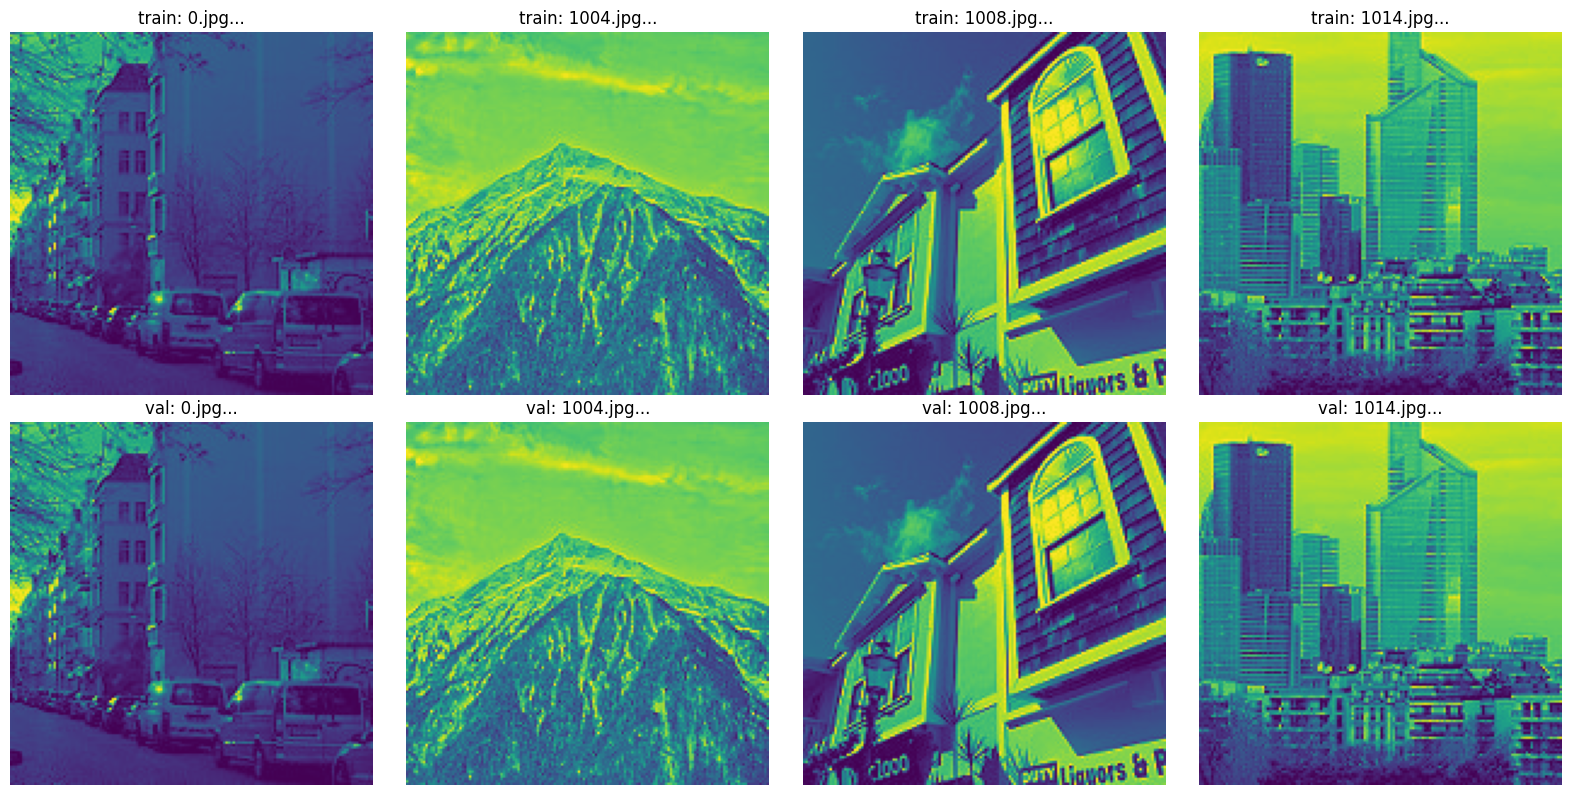

✅ Displayed 8 sample images


In [3]:
# Visualize some sample images from the dataset
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

sample_count = 0
for data_dir, files in dataset_info.items():
    if files and sample_count < 8:
        for filename in files[:min(4, len(files))]:
            if sample_count >= 8:
                break
                
            try:
                img_path = os.path.join(data_dir, filename)
                img = Image.open(img_path)
                
                axes[sample_count].imshow(img)
                axes[sample_count].set_title(f'{data_dir.split("/")[-1]}: {filename[:15]}...')
                axes[sample_count].axis('off')
                sample_count += 1
                
            except Exception as e:
                print(f"Error loading {filename}: {e}")

# Hide unused subplots
for i in range(sample_count, 8):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

print(f"✅ Displayed {sample_count} sample images")

In [4]:
# Analyze image properties
image_sizes = []
image_modes = []

for data_dir, files in dataset_info.items():
    if files:
        print(f"\n📊 Analyzing {data_dir}:")
        
        for filename in files[:5]:  # Analyze first 5 images
            try:
                img_path = os.path.join(data_dir, filename)
                with Image.open(img_path) as img:
                    image_sizes.append(img.size)
                    image_modes.append(img.mode)
                    print(f"   {filename}: {img.size} - {img.mode}")
                    
            except Exception as e:
                print(f"   Error with {filename}: {e}")

if image_sizes:
    unique_sizes = list(set(image_sizes))
    unique_modes = list(set(image_modes))
    
    print(f"\n📈 Dataset Statistics:")
    print(f"   Unique sizes: {unique_sizes}")
    print(f"   Unique modes: {unique_modes}")
    print(f"   Most common size: {max(set(image_sizes), key=image_sizes.count)}")
    print(f"   Most common mode: {max(set(image_modes), key=image_modes.count)}")


📊 Analyzing data/train:
   0.jpg: (150, 150) - L
   1004.jpg: (150, 150) - L
   1008.jpg: (150, 150) - L
   1014.jpg: (150, 150) - L
   1015.jpg: (150, 150) - L

📊 Analyzing data/val:
   0.jpg: (150, 150) - L
   1004.jpg: (150, 150) - L
   1008.jpg: (150, 150) - L
   1014.jpg: (150, 150) - L
   1015.jpg: (150, 150) - L

📈 Dataset Statistics:
   Unique sizes: [(150, 150)]
   Unique modes: ['L']
   Most common size: (150, 150)
   Most common mode: L
